### **Análisis demografico y proyecciones poblacionales**
#### **Caracteristicas**
#### **Objetivo:** Estimar la evolución de la población de diferentes paises o regiones y analizar el impacto de estos cambios demográficos

#### **Variables:** Son muchisimas las variables que pueden producir estos cambios de densidad poblacional. Por ahora nos centraremos en la tasa de natalidad o fertilidad y veremos como ésta se ve afectada por pais o región a lo largo del tiempo.
#### Mencionamos algunas de las variables que pueden impactar en la tasa de natalidad:
#### - Tasa de fertilidad
#### - Tasa de natalidad
#### - Esperanza de vida
#### - Tasa de mortalidad infantil
#### - Nivel de urbanización 
#### - Ingreso per cápita
#### - Acceso a la educación
#### - Acceso a métodos anticonceptivos
#### - Religión y creencias culturales
#### -Acceso a los servicios de salud
#### -Desigualdad económica
#### -Cambio climático

### ** Insights clave:**
#### identificar cómo ha disminuido la fertilidad en diferentes regiones del mundo (paises desarrollados vs en desarrollo)
#### Factores socioeconómicos. Relacionar el nivel de desarrollo económico de un pais (PIB per cápita) y la educación con la fertilidad. Sociedades mas ricas y con mejor educación suelen tener menos hijos.

 


### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

### Carda del dataset

In [2]:
df = pd.read_csv('API_SP_DYN_TFRT_IN_DS2_es_csv_v2_3436218.csv')

In [3]:
df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,"Tasa de fecundidad, total (nacimientos por mujer)",SP.DYN.TFRT.IN,4.820000,4.655000,4.471000,4.271000,4.059000,3.842000,...,1.972000,1.953000,1.839000,1.587000,1.486000,1.325000,1.180000,1.179000,NaN,NaN
1,NaN,AFE,"Tasa de fecundidad, total (nacimientos por mujer)",SP.DYN.TFRT.IN,6.724125,6.742752,6.762930,6.778712,6.788420,6.800322,...,4.677618,4.615670,4.570409,4.527705,4.482898,4.416900,4.354709,4.288788,NaN,NaN
2,Afganistán,AFG,"Tasa de fecundidad, total (nacimientos por mujer)",SP.DYN.TFRT.IN,7.282000,7.284000,7.292000,7.302000,7.304000,7.305000,...,5.405000,5.262000,5.129000,5.002000,4.870000,4.750000,4.643000,4.523000,NaN,NaN
3,NaN,AFW,"Tasa de fecundidad, total (nacimientos por mujer)",SP.DYN.TFRT.IN,6.458448,6.471518,6.491826,6.506088,6.525355,6.541102,...,5.385059,5.328709,5.255345,5.186319,5.118932,5.049329,4.978662,4.897322,NaN,NaN
4,Angola,AGO,"Tasa de fecundidad, total (nacimientos por mujer)",SP.DYN.TFRT.IN,6.708000,6.790000,6.872000,6.954000,7.036000,7.116000,...,5.774000,5.686000,5.600000,5.519000,5.442000,5.371000,5.304000,5.209000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Tasa de fecundidad, total (nacimientos por mujer)",SP.DYN.TFRT.IN,6.359000,6.350000,6.331000,6.296000,6.126000,5.927000,...,1.751000,1.658000,1.649000,1.605000,1.546000,1.529000,1.522000,1.510000,NaN,NaN
262,"Yemen, Rep. del",YEM,"Tasa de fecundidad, total (nacimientos por mujer)",SP.DYN.TFRT.IN,7.938000,7.963000,7.963000,7.981000,8.038000,8.067000,...,4.322000,4.214000,4.112000,4.043000,3.963000,3.886000,3.795000,3.716000,NaN,NaN
263,Sudáfrica,ZAF,"Tasa de fecundidad, total (nacimientos por mujer)",SP.DYN.TFRT.IN,6.159000,6.138000,6.110000,6.077000,6.030000,5.967000,...,2.359000,2.261000,2.334000,2.418000,2.475000,2.401000,2.374000,2.341000,NaN,NaN
264,Zambia,ZMB,"Tasa de fecundidad, total (nacimientos por mujer)",SP.DYN.TFRT.IN,7.115000,7.169000,7.214000,7.249000,7.274000,7.291000,...,4.793000,4.707000,4.614000,4.536000,4.451000,4.379000,4.308000,4.242000,NaN,NaN


## ***EDA***

### Limpieza de datos

In [4]:
# Buscamos filas duplicadas
duplicados = df[df.duplicated()]
print("Filas duplicadas excluyendo la primera aparición")
print(duplicados)

Filas duplicadas excluyendo la primera aparición
Empty DataFrame
Columns: [Country Name, Country Code, Indicator Name, Indicator Code, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, Unnamed: 68]
Index: []

[0 rows x 69 columns]


#### No tenemos filas duplicadas

In [5]:
# Buscamos valores nulos
df.isnull().sum()

Country Name        2
Country Code        0
Indicator Name      0
Indicator Code      0
1960               13
                 ... 
2020                7
2021                8
2022                8
2023              266
Unnamed: 68       266
Length: 69, dtype: int64

In [7]:
# vamos a ver cuales son estas filas
filas_con_null = df[df.isnull().any(axis = 1)]
filas_con_null

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,"Tasa de fecundidad, total (nacimientos por mujer)",SP.DYN.TFRT.IN,4.820000,4.655000,4.471000,4.271000,4.059000,3.842000,...,1.972000,1.953000,1.839000,1.587000,1.486000,1.325000,1.180000,1.179000,NaN,NaN
1,NaN,AFE,"Tasa de fecundidad, total (nacimientos por mujer)",SP.DYN.TFRT.IN,6.724125,6.742752,6.762930,6.778712,6.788420,6.800322,...,4.677618,4.615670,4.570409,4.527705,4.482898,4.416900,4.354709,4.288788,NaN,NaN
2,Afganistán,AFG,"Tasa de fecundidad, total (nacimientos por mujer)",SP.DYN.TFRT.IN,7.282000,7.284000,7.292000,7.302000,7.304000,7.305000,...,5.405000,5.262000,5.129000,5.002000,4.870000,4.750000,4.643000,4.523000,NaN,NaN
3,NaN,AFW,"Tasa de fecundidad, total (nacimientos por mujer)",SP.DYN.TFRT.IN,6.458448,6.471518,6.491826,6.506088,6.525355,6.541102,...,5.385059,5.328709,5.255345,5.186319,5.118932,5.049329,4.978662,4.897322,NaN,NaN
4,Angola,AGO,"Tasa de fecundidad, total (nacimientos por mujer)",SP.DYN.TFRT.IN,6.708000,6.790000,6.872000,6.954000,7.036000,7.116000,...,5.774000,5.686000,5.600000,5.519000,5.442000,5.371000,5.304000,5.209000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Tasa de fecundidad, total (nacimientos por mujer)",SP.DYN.TFRT.IN,6.359000,6.350000,6.331000,6.296000,6.126000,5.927000,...,1.751000,1.658000,1.649000,1.605000,1.546000,1.529000,1.522000,1.510000,NaN,NaN
262,"Yemen, Rep. del",YEM,"Tasa de fecundidad, total (nacimientos por mujer)",SP.DYN.TFRT.IN,7.938000,7.963000,7.963000,7.981000,8.038000,8.067000,...,4.322000,4.214000,4.112000,4.043000,3.963000,3.886000,3.795000,3.716000,NaN,NaN
263,Sudáfrica,ZAF,"Tasa de fecundidad, total (nacimientos por mujer)",SP.DYN.TFRT.IN,6.159000,6.138000,6.110000,6.077000,6.030000,5.967000,...,2.359000,2.261000,2.334000,2.418000,2.475000,2.401000,2.374000,2.341000,NaN,NaN
264,Zambia,ZMB,"Tasa de fecundidad, total (nacimientos por mujer)",SP.DYN.TFRT.IN,7.115000,7.169000,7.214000,7.249000,7.274000,7.291000,...,4.793000,4.707000,4.614000,4.536000,4.451000,4.379000,4.308000,4.242000,NaN,NaN


### A priori vemos que hay países donde no nos figura el nombre pero si el código, eso lo solucionamos buscando el el país por su código, luego la columna (Serie) que corresponde al año 2023 no tiene datos, por lo cual podemos eliminarla. tambien tenemos registros en los que en muchos años no se han podido registrar valores de natalidad. en este caso no deberiamos borrar un registro porque estoy eliminando un país. Como primera medida podríamos llenar esos vacíos con el promedio del registro

In [8]:
df = df.drop('2023', axis = 1)
df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 68
0,Aruba,ABW,"Tasa de fecundidad, total (nacimientos por mujer)",SP.DYN.TFRT.IN,4.820000,4.655000,4.471000,4.271000,4.059000,3.842000,...,2.148000,1.972000,1.953000,1.839000,1.587000,1.486000,1.325000,1.180000,1.179000,NaN
1,NaN,AFE,"Tasa de fecundidad, total (nacimientos por mujer)",SP.DYN.TFRT.IN,6.724125,6.742752,6.762930,6.778712,6.788420,6.800322,...,4.739861,4.677618,4.615670,4.570409,4.527705,4.482898,4.416900,4.354709,4.288788,NaN
2,Afganistán,AFG,"Tasa de fecundidad, total (nacimientos por mujer)",SP.DYN.TFRT.IN,7.282000,7.284000,7.292000,7.302000,7.304000,7.305000,...,5.560000,5.405000,5.262000,5.129000,5.002000,4.870000,4.750000,4.643000,4.523000,NaN
3,NaN,AFW,"Tasa de fecundidad, total (nacimientos por mujer)",SP.DYN.TFRT.IN,6.458448,6.471518,6.491826,6.506088,6.525355,6.541102,...,5.437493,5.385059,5.328709,5.255345,5.186319,5.118932,5.049329,4.978662,4.897322,NaN
4,Angola,AGO,"Tasa de fecundidad, total (nacimientos por mujer)",SP.DYN.TFRT.IN,6.708000,6.790000,6.872000,6.954000,7.036000,7.116000,...,5.864000,5.774000,5.686000,5.600000,5.519000,5.442000,5.371000,5.304000,5.209000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Tasa de fecundidad, total (nacimientos por mujer)",SP.DYN.TFRT.IN,6.359000,6.350000,6.331000,6.296000,6.126000,5.927000,...,1.871000,1.751000,1.658000,1.649000,1.605000,1.546000,1.529000,1.522000,1.510000,NaN
262,"Yemen, Rep. del",YEM,"Tasa de fecundidad, total (nacimientos por mujer)",SP.DYN.TFRT.IN,7.938000,7.963000,7.963000,7.981000,8.038000,8.067000,...,4.427000,4.322000,4.214000,4.112000,4.043000,3.963000,3.886000,3.795000,3.716000,NaN
263,Sudáfrica,ZAF,"Tasa de fecundidad, total (nacimientos por mujer)",SP.DYN.TFRT.IN,6.159000,6.138000,6.110000,6.077000,6.030000,5.967000,...,2.424000,2.359000,2.261000,2.334000,2.418000,2.475000,2.401000,2.374000,2.341000,NaN
264,Zambia,ZMB,"Tasa de fecundidad, total (nacimientos por mujer)",SP.DYN.TFRT.IN,7.115000,7.169000,7.214000,7.249000,7.274000,7.291000,...,4.899000,4.793000,4.707000,4.614000,4.536000,4.451000,4.379000,4.308000,4.242000,NaN


In [12]:
#Eliminamos tambien la columna que nos quedó sin nombre que vino vacía desde el dataSet 'Unnamed: 68'
df.drop('Unnamed: 68',axis = 1, inplace = True)
df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,"Tasa de fecundidad, total (nacimientos por mujer)",SP.DYN.TFRT.IN,4.820000,4.655000,4.471000,4.271000,4.059000,3.842000,...,2.11700,2.148000,1.972000,1.953000,1.839000,1.587000,1.486000,1.325000,1.180000,1.179000
1,NaN,AFE,"Tasa de fecundidad, total (nacimientos por mujer)",SP.DYN.TFRT.IN,6.724125,6.742752,6.762930,6.778712,6.788420,6.800322,...,4.80882,4.739861,4.677618,4.615670,4.570409,4.527705,4.482898,4.416900,4.354709,4.288788
2,Afganistán,AFG,"Tasa de fecundidad, total (nacimientos por mujer)",SP.DYN.TFRT.IN,7.282000,7.284000,7.292000,7.302000,7.304000,7.305000,...,5.69600,5.560000,5.405000,5.262000,5.129000,5.002000,4.870000,4.750000,4.643000,4.523000
3,NaN,AFW,"Tasa de fecundidad, total (nacimientos por mujer)",SP.DYN.TFRT.IN,6.458448,6.471518,6.491826,6.506088,6.525355,6.541102,...,5.50635,5.437493,5.385059,5.328709,5.255345,5.186319,5.118932,5.049329,4.978662,4.897322
4,Angola,AGO,"Tasa de fecundidad, total (nacimientos por mujer)",SP.DYN.TFRT.IN,6.708000,6.790000,6.872000,6.954000,7.036000,7.116000,...,5.95300,5.864000,5.774000,5.686000,5.600000,5.519000,5.442000,5.371000,5.304000,5.209000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Tasa de fecundidad, total (nacimientos por mujer)",SP.DYN.TFRT.IN,6.359000,6.350000,6.331000,6.296000,6.126000,5.927000,...,2.09800,1.871000,1.751000,1.658000,1.649000,1.605000,1.546000,1.529000,1.522000,1.510000
262,"Yemen, Rep. del",YEM,"Tasa de fecundidad, total (nacimientos por mujer)",SP.DYN.TFRT.IN,7.938000,7.963000,7.963000,7.981000,8.038000,8.067000,...,4.52900,4.427000,4.322000,4.214000,4.112000,4.043000,3.963000,3.886000,3.795000,3.716000
263,Sudáfrica,ZAF,"Tasa de fecundidad, total (nacimientos por mujer)",SP.DYN.TFRT.IN,6.159000,6.138000,6.110000,6.077000,6.030000,5.967000,...,2.42800,2.424000,2.359000,2.261000,2.334000,2.418000,2.475000,2.401000,2.374000,2.341000
264,Zambia,ZMB,"Tasa de fecundidad, total (nacimientos por mujer)",SP.DYN.TFRT.IN,7.115000,7.169000,7.214000,7.249000,7.274000,7.291000,...,5.02600,4.899000,4.793000,4.707000,4.614000,4.536000,4.451000,4.379000,4.308000,4.242000


### LLenamos los registros vacios de los datos de natalidad por año con el promedio de cada uno de sus registros. para esto primero seleccionamos las columnas que tienen datos numericos, luego calculamos la media por columna y luego mediante una funcion lambda aplicamos ese promedio a cada registro que tenga valores nulos.

In [16]:
columnas_numericas = df.iloc[:,4:]
columnas_numericas.head(6)

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,4.820000,4.655000,4.471000,4.271000,4.059000,3.842000,3.625000,3.417000,3.226000,3.054000,...,2.11700,2.148000,1.972000,1.953000,1.839000,1.587000,1.486000,1.325000,1.180000,1.179000
1,6.724125,6.742752,6.762930,6.778712,6.788420,6.800322,6.810571,6.818612,6.828560,6.834418,...,4.80882,4.739861,4.677618,4.615670,4.570409,4.527705,4.482898,4.416900,4.354709,4.288788
2,7.282000,7.284000,7.292000,7.302000,7.304000,7.305000,7.320000,7.339000,7.363000,7.389000,...,5.69600,5.560000,5.405000,5.262000,5.129000,5.002000,4.870000,4.750000,4.643000,4.523000
3,6.458448,6.471518,6.491826,6.506088,6.525355,6.541102,6.564967,6.589806,6.612775,6.635181,...,5.50635,5.437493,5.385059,5.328709,5.255345,5.186319,5.118932,5.049329,4.978662,4.897322
4,6.708000,6.790000,6.872000,6.954000,7.036000,7.116000,7.194000,7.267000,7.332000,7.388000,...,5.95300,5.864000,5.774000,5.686000,5.600000,5.519000,5.442000,5.371000,5.304000,5.209000
5,6.455000,6.353000,6.207000,6.047000,5.849000,5.623000,5.465000,5.404000,5.338000,5.258000,...,1.69700,1.674000,1.613000,1.551000,1.491000,1.440000,1.414000,1.400000,1.390000,1.376000


In [19]:
promedio_por_registro = columnas_numericas.mean(axis = 1)
promedio_por_registro

0      2.401143
1      5.927532
2      6.959873
3      6.214732
4      6.795460
         ...   
261    3.687238
262    6.981762
263    3.876000
264    6.294270
265    5.263683
Length: 266, dtype: float64

In [23]:
# Ahora reemplazamos los valores con Nan solo en las columnas numericas con el promedio de la fila
df[columnas_numericas.columns] = columnas_numericas.apply(lambda fila: fila.fillna(fila.mean()))


#### Esto lo que hace es: df[columnas_numericas.columns] --> actualiza el df con los valores de columnas numericas, solo en las columnas que coinciden el indice, es decir llena el df con los valores de las columnas numericas(para utilizar solo esas)
### la funcion apply se aplica a cada fila fila del df (como si fuera un for) entonces lambda toma una fila y a esa fila le aplica fillna(fila.mean())

In [21]:
# Buscamos valores nulos
df.isnull().sum()

Country Name      2
Country Code      0
Indicator Name    0
Indicator Code    0
1960              0
                 ..
2018              0
2019              0
2020              0
2021              0
2022              0
Length: 67, dtype: int64

### Descripcion del dataSet limpio

In [24]:
df.describe

<bound method NDFrame.describe of         Country Name Country Code  \
0              Aruba          ABW   
1                NaN          AFE   
2         Afganistán          AFG   
3                NaN          AFW   
4             Angola          AGO   
..               ...          ...   
261           Kosovo          XKX   
262  Yemen, Rep. del          YEM   
263        Sudáfrica          ZAF   
264           Zambia          ZMB   
265         Zimbabwe          ZWE   

                                        Indicator Name  Indicator Code  \
0    Tasa de fecundidad, total (nacimientos por mujer)  SP.DYN.TFRT.IN   
1    Tasa de fecundidad, total (nacimientos por mujer)  SP.DYN.TFRT.IN   
2    Tasa de fecundidad, total (nacimientos por mujer)  SP.DYN.TFRT.IN   
3    Tasa de fecundidad, total (nacimientos por mujer)  SP.DYN.TFRT.IN   
4    Tasa de fecundidad, total (nacimientos por mujer)  SP.DYN.TFRT.IN   
..                                                 ...             ...   
261

In [25]:
df.size

17822

In [26]:
df.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1960              float64
                   ...   
2018              float64
2019              float64
2020              float64
2021              float64
2022              float64
Length: 67, dtype: object

In [27]:
df.shape

(266, 67)

In [28]:
df.info

<bound method DataFrame.info of         Country Name Country Code  \
0              Aruba          ABW   
1                NaN          AFE   
2         Afganistán          AFG   
3                NaN          AFW   
4             Angola          AGO   
..               ...          ...   
261           Kosovo          XKX   
262  Yemen, Rep. del          YEM   
263        Sudáfrica          ZAF   
264           Zambia          ZMB   
265         Zimbabwe          ZWE   

                                        Indicator Name  Indicator Code  \
0    Tasa de fecundidad, total (nacimientos por mujer)  SP.DYN.TFRT.IN   
1    Tasa de fecundidad, total (nacimientos por mujer)  SP.DYN.TFRT.IN   
2    Tasa de fecundidad, total (nacimientos por mujer)  SP.DYN.TFRT.IN   
3    Tasa de fecundidad, total (nacimientos por mujer)  SP.DYN.TFRT.IN   
4    Tasa de fecundidad, total (nacimientos por mujer)  SP.DYN.TFRT.IN   
..                                                 ...             ...   
261  

In [30]:
df.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
count,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.00000,...,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000
mean,5.448716,5.427642,5.460803,5.492422,5.430514,5.385446,5.326849,5.272278,5.230322,5.17576,...,2.833163,2.810770,2.772710,2.739612,2.692368,2.650901,2.609374,2.559056,2.541380,2.499053
std,1.633196,1.636458,1.655440,1.663310,1.678858,1.703107,1.733690,1.738723,1.770489,1.78722,...,1.376245,1.343017,1.321650,1.296466,1.280135,1.265951,1.250609,1.240573,1.210641,1.193091
min,1.940000,1.940000,1.790000,1.820000,1.790000,1.740000,1.580000,1.800000,1.830000,1.87000,...,1.080000,1.205000,1.186000,0.987000,0.872000,0.917000,0.918000,0.837000,0.772000,0.701000
25%,4.389398,4.310750,4.408250,4.354000,4.118500,4.001000,3.820000,3.801500,3.643206,3.51000,...,1.760323,1.767105,1.740009,1.737164,1.705500,1.660539,1.624570,1.582951,1.596250,1.570250
50%,6.000500,5.956994,6.013791,6.086135,5.970000,5.941000,5.859000,5.782539,5.753680,5.70550,...,2.403318,2.369719,2.321897,2.306068,2.271500,2.247000,2.207500,2.162211,2.157859,2.140000
75%,6.715750,6.697750,6.692000,6.746250,6.698308,6.690410,6.689000,6.673750,6.668851,6.66250,...,3.620954,3.576158,3.515260,3.459786,3.398901,3.345922,3.313624,3.255717,3.231500,3.186000
max,8.234000,8.266000,8.285000,8.309000,8.330000,8.344000,8.356000,8.340000,8.315000,8.26400,...,7.344000,7.279000,7.211000,7.141000,7.084000,7.023000,6.961000,6.892000,6.820000,6.749000


### Para tener una idea general de los datos realizamos un gráfico de linea en la cuál representamos el promedio mundial (sin importar el pais) por año.

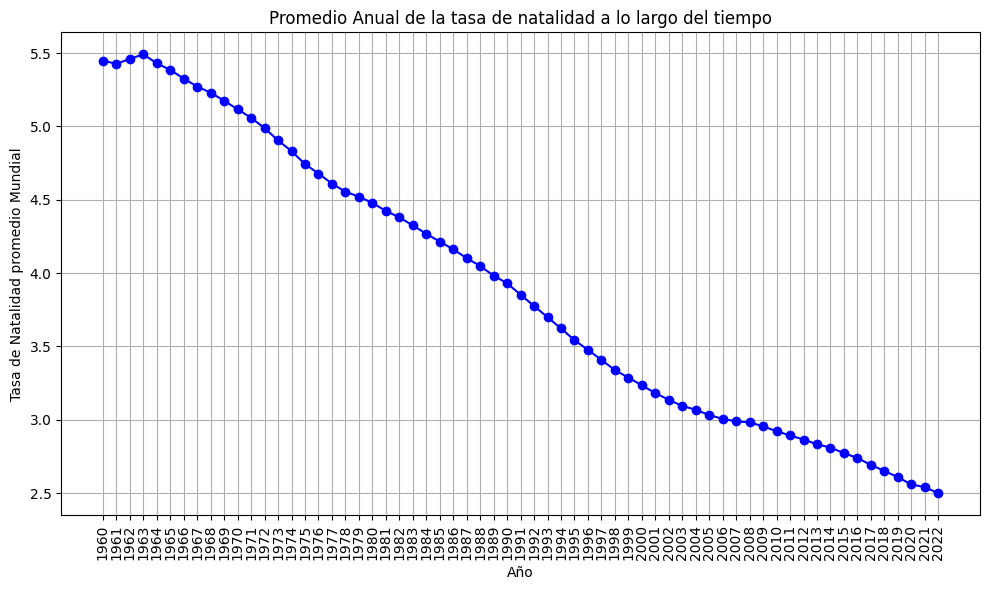

In [51]:
df_numerico = df.select_dtypes(include='number')
promedio_por_anio = df_numerico.mean()

plt.figure(figsize = (10,6))
plt.plot(promedio_por_anio.index, promedio_por_anio.values, marker ='o', linestyle ='-',color = 'b')

plt.xticks(rotation=90)
plt.xlabel('Año')
plt.ylabel('Tasa de Natalidad promedio Mundial')
plt.title('Promedio Anual de la tasa de natalidad a lo largo del tiempo')

plt.grid(True)
plt.tight_layout()
plt.show()

### ultimos 10 años de cada País

In [69]:
df_ultimos_diez = df.iloc[:,[0,56,57,58,59,60,61,62,63,64,65,66]]
df_ultimos_diez

,Country Name,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,2.028000,2.11700,2.148000,1.972000,1.953000,1.839000,1.587000,1.486000,1.325000,1.180000,1.179000
1,NaN,4.879018,4.80882,4.739861,4.677618,4.615670,4.570409,4.527705,4.482898,4.416900,4.354709,4.288788
2,Afganistán,5.830000,5.69600,5.560000,5.405000,5.262000,5.129000,5.002000,4.870000,4.750000,4.643000,4.523000
3,NaN,5.580892,5.50635,5.437493,5.385059,5.328709,5.255345,5.186319,5.118932,5.049329,4.978662,4.897322
4,Angola,6.039000,5.95300,5.864000,5.774000,5.686000,5.600000,5.519000,5.442000,5.371000,5.304000,5.209000
...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,2.001000,2.09800,1.871000,1.751000,1.658000,1.649000,1.605000,1.546000,1.529000,1.522000,1.510000
262,"Yemen, Rep. del",4.634000,4.52900,4.427000,4.322000,4.214000,4.112000,4.043000,3.963000,3.886000,3.795000,3.716000
263,Sudáfrica,2.447000,2.42800,2.424000,2.359000,2.261000,2.334000,2.418000,2.475000,2.401000,2.374000,2.341000
264,Zambia,5.146000,5.02600,4.899000,4.793000,4.707000,4.614000,4.536000,4.451000,4.379000,4.308000,4.242000


In [72]:
from matplotlib.gridspec import GridSpec